# Exploratory Data Analysis

Having processed our movie data, we'll proceed to explore our data. To do this, the following dependencies would be loaded. Pandas for organize our data, nltk for NLP, matplotlib and seaborn for plotting, and itertools and collections to assist in data structuring.

In [1]:
# Importing dependencies
import pandas as pd
import nltk
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# Loading processed file from our data cleaning process
file = 'processed_movie_dialogues.csv'
df = pd.read_csv(file)

In [3]:
df

,Unnamed: 0,Comment,Reply,Processed Comment,Processed Reply,Comment Length,Reply Length
0,0,Can we make this quick? Roxanne Korrine and An...,"Well, I thought we'd start with pronunciation,...",can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,21,14
1,1,"Well, I thought we'd start with pronunciation,...",Not the hacking and gagging and spitting part....,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,14,9
2,2,Not the hacking and gagging and spitting part....,Okay... then how 'bout we try out some French ...,not the hacking and gagging and spitting part ...,okay then how about we try out some french cui...,9,12
3,3,You're asking me out. That's so cute. What's y...,Forget it.,you are asking me out that is so cute what is ...,forget it,14,2
4,4,"No, no, it's my fault - we didn't have a prope...",Cameron.,no no it is my fault we did not have a proper ...,cameron,16,1
...,...,...,...,...,...,...,...
221611,221611,"Your orders, Mr Vereker?",I'm to take the Sikali with the main column to...,your orders mr vereker,i am to take the sikali with the main column t...,4,13
221612,221612,I'm to take the Sikali with the main column to...,Lord Chelmsford seems to want me to stay back ...,i am to take the sikali with the main column t...,lord chelmsford seems to want me to stay back ...,13,12
221613,221613,Lord Chelmsford seems to want me to stay back ...,I think Chelmsford wants a good man on the bor...,lord chelmsford seems to want me to stay back ...,i think chelmsford wants a good man on the bor...,12,23
221614,221614,"Well I assure you, Sir, I have no desire to cr...","And I assure you, you do not In fact I'd be ob...",well i assure you sir i have no desire to crea...,and i assure you you do not in fact i would be...,13,22


In [4]:
# Dropping extraneous column from the DataFrame
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
df

,Comment,Reply,Processed Comment,Processed Reply,Comment Length,Reply Length
0,Can we make this quick? Roxanne Korrine and An...,"Well, I thought we'd start with pronunciation,...",can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,21,14
1,"Well, I thought we'd start with pronunciation,...",Not the hacking and gagging and spitting part....,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,14,9
2,Not the hacking and gagging and spitting part....,Okay... then how 'bout we try out some French ...,not the hacking and gagging and spitting part ...,okay then how about we try out some french cui...,9,12
3,You're asking me out. That's so cute. What's y...,Forget it.,you are asking me out that is so cute what is ...,forget it,14,2
4,"No, no, it's my fault - we didn't have a prope...",Cameron.,no no it is my fault we did not have a proper ...,cameron,16,1
...,...,...,...,...,...,...
221611,"Your orders, Mr Vereker?",I'm to take the Sikali with the main column to...,your orders mr vereker,i am to take the sikali with the main column t...,4,13
221612,I'm to take the Sikali with the main column to...,Lord Chelmsford seems to want me to stay back ...,i am to take the sikali with the main column t...,lord chelmsford seems to want me to stay back ...,13,12
221613,Lord Chelmsford seems to want me to stay back ...,I think Chelmsford wants a good man on the bor...,lord chelmsford seems to want me to stay back ...,i think chelmsford wants a good man on the bor...,12,23
221614,"Well I assure you, Sir, I have no desire to cr...","And I assure you, you do not In fact I'd be ob...",well i assure you sir i have no desire to crea...,and i assure you you do not in fact i would be...,13,22


In [6]:
# Checking data types in DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221616 entries, 0 to 221615
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Comment            221616 non-null  object
 1   Reply              221616 non-null  object
 2   Processed Comment  221610 non-null  object
 3   Processed Reply    221613 non-null  object
 4   Comment Length     221616 non-null  int64 
 5   Reply Length       221616 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 10.1+ MB


In [7]:
df[df['Processed Comment'].isna() == True]

,Comment,Reply,Processed Comment,Processed Reply,Comment Length,Reply Length
36363,.,.,NaN,NaN,1,1
36580,**?!!,"Newer, more powerful design.",NaN,newer more powerful design,1,4
87489,???,What?,NaN,what,1,1
87514,???,I don't believe this. I don't bloody believe t...,NaN,i do not believe this i do not bloody believe ...,1,11
87651,???,"??? ... virginity, right Mother? Poverty, chas...",NaN,virginity right mother poverty chastity and ig...,1,14
151966,?!,It has a broken leg!,NaN,it has a broken leg,1,5


In [8]:
df[df['Processed Reply'].isna() == True]

,Comment,Reply,Processed Comment,Processed Reply,Comment Length,Reply Length
36363,.,.,NaN,NaN,1,1
36579,PEM115!,**?!!,pem115,NaN,1,1
87488,Agnes? Who? Mother Superior?,???,agnes who mother superior,NaN,4,1


There seems to be stray NaNs in our dataset as well as weird comments and replies that are just punctuations. In our case, we'll remove them all as they are not proper (comment, reply) responses.

In [9]:
# Dropping NaNs from dataset
df = df.drop(df[df['Processed Comment'].isna()].index)
df = df.drop(df[df['Processed Reply'].isna()].index)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221608 entries, 0 to 221615
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Comment            221608 non-null  object
 1   Reply              221608 non-null  object
 2   Processed Comment  221608 non-null  object
 3   Processed Reply    221608 non-null  object
 4   Comment Length     221608 non-null  int64 
 5   Reply Length       221608 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 11.8+ MB


Before utilizing the full capacity of NLTK for NLP, we'll first explore the frequency of repsonses.

In [11]:
# Checking the frequency of comments using NLTK's FreqDist() function
fdist_common_comments = FreqDist(df['Processed Comment'])
fdist_common_comments.most_common(20)

[('what', 1732),
 ('yes', 1383),
 ('no', 1303),
 ('yeah', 1030),
 ('why', 526),
 ('i do not know', 304),
 ('hello', 260),
 ('who', 254),
 ('why not', 226),
 ('oh', 214),
 ('what is it', 214),
 ('what do you mean', 213),
 ('what is that', 208),
 ('none', 205),
 ('okay', 203),
 ('huh', 198),
 ('what are you doing', 195),
 ('really', 189),
 ('hi', 187),
 ('thank you', 184)]

In [12]:
# Checking the frequency of replies using NLTK's FreqDist() function
fdist_common_replies = FreqDist(df['Processed Reply'])
fdist_common_replies.most_common(20)

[('what', 1600),
 ('yes', 1540),
 ('no', 1496),
 ('yeah', 1170),
 ('why', 512),
 ('i do not know', 408),
 ('okay', 377),
 ('oh', 293),
 ('sure', 285),
 ('thank you', 250),
 ('who', 248),
 ('yes sir', 243),
 ('why not', 242),
 ('i know', 231),
 ('right', 213),
 ('huh', 212),
 ('none', 211),
 ('really', 208),
 ('what do you mean', 208),
 ('thanks', 186)]

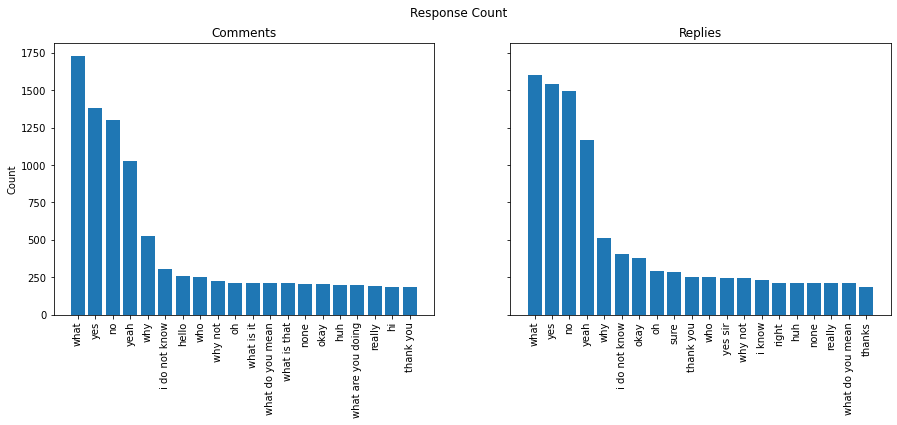

In [13]:
# Plotting the top 20 responses for both comments and replies
fig1, ax1 = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
x_comment = dict(fdist_common_comments.most_common(20)).keys()
y_comment_count = dict(fdist_common_comments.most_common(20)).values()
x_reply = dict(fdist_common_replies.most_common(20)).keys()
y_reply_count = dict(fdist_common_replies.most_common(20)).values()
ax1[0].bar(x_comment, y_comment_count)
ax1[0].tick_params('x', rotation = 90)
ax1[0].set_title('Comments')
ax1[1].bar(x_reply, y_reply_count)
ax1[1].tick_params('x', rotation = 90)
ax1[1].set_title('Replies')
ax1[0].set_ylabel('Count')
fig1.suptitle('Response Count')
plt.show()

In order for us to use the data later on for training and testing, the responses needs to be broken down into tokens. For this, we will utilize NLTK's word tokenizer, the word_tokenize() function.

In [14]:
# Tokenizing Text using NLTK's word tokenizer
df['Tokenized Comment'] = df['Processed Comment'].apply(word_tokenize)
df['Tokenized Reply'] = df['Processed Reply'].apply(word_tokenize)
df

,Comment,Reply,Processed Comment,Processed Reply,Comment Length,Reply Length,Tokenized Comment,Tokenized Reply
0,Can we make this quick? Roxanne Korrine and An...,"Well, I thought we'd start with pronunciation,...",can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,21,14,"[can, we, make, this, quick, roxanne, korrine,...","[well, i, thought, we, would, start, with, pro..."
1,"Well, I thought we'd start with pronunciation,...",Not the hacking and gagging and spitting part....,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,14,9,"[well, i, thought, we, would, start, with, pro...","[not, the, hacking, and, gagging, and, spittin..."
2,Not the hacking and gagging and spitting part....,Okay... then how 'bout we try out some French ...,not the hacking and gagging and spitting part ...,okay then how about we try out some french cui...,9,12,"[not, the, hacking, and, gagging, and, spittin...","[okay, then, how, about, we, try, out, some, f..."
3,You're asking me out. That's so cute. What's y...,Forget it.,you are asking me out that is so cute what is ...,forget it,14,2,"[you, are, asking, me, out, that, is, so, cute...","[forget, it]"
4,"No, no, it's my fault - we didn't have a prope...",Cameron.,no no it is my fault we did not have a proper ...,cameron,16,1,"[no, no, it, is, my, fault, we, did, not, have...",[cameron]
...,...,...,...,...,...,...,...,...
221611,"Your orders, Mr Vereker?",I'm to take the Sikali with the main column to...,your orders mr vereker,i am to take the sikali with the main column t...,4,13,"[your, orders, mr, vereker]","[i, am, to, take, the, sikali, with, the, main..."
221612,I'm to take the Sikali with the main column to...,Lord Chelmsford seems to want me to stay back ...,i am to take the sikali with the main column t...,lord chelmsford seems to want me to stay back ...,13,12,"[i, am, to, take, the, sikali, with, the, main...","[lord, chelmsford, seems, to, want, me, to, st..."
221613,Lord Chelmsford seems to want me to stay back ...,I think Chelmsford wants a good man on the bor...,lord chelmsford seems to want me to stay back ...,i think chelmsford wants a good man on the bor...,12,23,"[lord, chelmsford, seems, to, want, me, to, st...","[i, think, chelmsford, wants, a, good, man, on..."
221614,"Well I assure you, Sir, I have no desire to cr...","And I assure you, you do not In fact I'd be ob...",well i assure you sir i have no desire to crea...,and i assure you you do not in fact i would be...,13,22,"[well, i, assure, you, sir, i, have, no, desir...","[and, i, assure, you, you, do, not, in, fact, ..."


We could check the frequency of individual words after being tokenized.

In [15]:
# Taking the lists from DataFrame and flattening it into one list
all_words_comments = list(itertools.chain.from_iterable(df['Tokenized Comment'][:]))
all_words_replies = list(itertools.chain.from_iterable(df['Tokenized Reply'][:]))

In [16]:
fdist_common_comment_words = FreqDist(all_words_comments)
fdist_common_comment_words.most_common(20)

[('you', 108941),
 ('i', 97821),
 ('the', 69651),
 ('to', 62192),
 ('is', 56827),
 ('a', 49795),
 ('not', 48650),
 ('it', 45483),
 ('do', 33384),
 ('that', 32974),
 ('and', 31546),
 ('what', 29413),
 ('are', 28534),
 ('of', 27761),
 ('have', 24481),
 ('in', 23959),
 ('me', 22851),
 ('we', 20060),
 ('he', 19055),
 ('am', 17745)]

In [17]:
fdist_common_reply_words = FreqDist(all_words_replies)
fdist_common_reply_words.most_common(20)

[('i', 106565),
 ('you', 105424),
 ('the', 71232),
 ('to', 63975),
 ('is', 57691),
 ('not', 52849),
 ('a', 52425),
 ('it', 49212),
 ('that', 34530),
 ('do', 34331),
 ('and', 34292),
 ('of', 29087),
 ('are', 27017),
 ('what', 25759),
 ('in', 24984),
 ('have', 24873),
 ('me', 23849),
 ('we', 20405),
 ('he', 20396),
 ('am', 19459)]

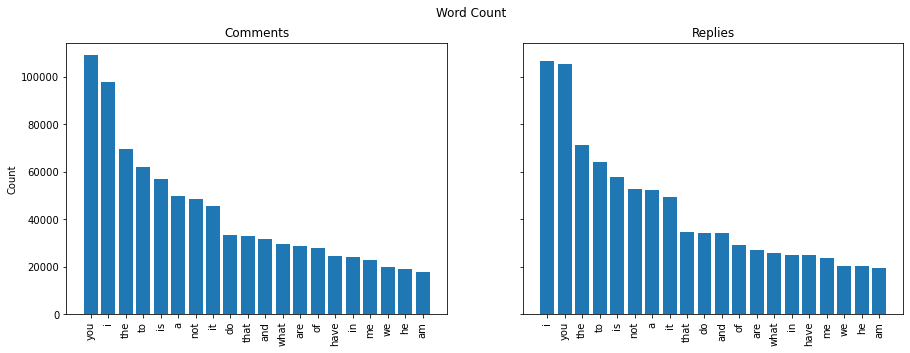

In [18]:
# Plotting the top 20 words for both comments and replies
fig2, ax2 = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
x_comment_word = dict(fdist_common_comment_words.most_common(20)).keys()
y_comment_word_count = dict(fdist_common_comment_words.most_common(20)).values()
x_reply_word = dict(fdist_common_reply_words.most_common(20)).keys()
y_reply_word_count = dict(fdist_common_reply_words.most_common(20)).values()
ax2[0].bar(x_comment_word, y_comment_word_count)
ax2[0].tick_params('x', rotation = 90)
ax2[0].set_title('Comments')
ax2[1].bar(x_reply_word, y_reply_word_count)
ax2[1].tick_params('x', rotation = 90)
ax2[1].set_title('Replies')
ax2[0].set_ylabel('Count')
fig2.suptitle('Word Count')
plt.show()

While stop words are useful when carrying out a conversation, the words themselves carry very little information, thus for NLP, English stop-words are removed. Here, we'll do so using the stop words stored in NLTK's stopwords.words(). But we might want to keep the data with the stop-words as we want to build a chatbot that talks like a person and less robot-like. So we'll tag these newly processed columns with the label 'no_sw'.

In [19]:
# Defining function to remove stop-words from our dataset
stop_words = set(stopwords.words("english"))
def remove_stopwords(text):
    return [i for i in text if i not in stop_words]

In [20]:
# Removing stop words
df['Comment_no_sw'] = df['Tokenized Comment'].apply(remove_stopwords)
df['Reply_no_sw'] = df['Tokenized Reply'].apply(remove_stopwords)
df

,Comment,Reply,Processed Comment,Processed Reply,Comment Length,Reply Length,Tokenized Comment,Tokenized Reply,Comment_no_sw,Reply_no_sw
0,Can we make this quick? Roxanne Korrine and An...,"Well, I thought we'd start with pronunciation,...",can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,21,14,"[can, we, make, this, quick, roxanne, korrine,...","[well, i, thought, we, would, start, with, pro...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o..."
1,"Well, I thought we'd start with pronunciation,...",Not the hacking and gagging and spitting part....,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,14,9,"[well, i, thought, we, would, start, with, pro...","[not, the, hacking, and, gagging, and, spittin...","[well, thought, would, start, pronunciation, o...","[hacking, gagging, spitting, part, please]"
2,Not the hacking and gagging and spitting part....,Okay... then how 'bout we try out some French ...,not the hacking and gagging and spitting part ...,okay then how about we try out some french cui...,9,12,"[not, the, hacking, and, gagging, and, spittin...","[okay, then, how, about, we, try, out, some, f...","[hacking, gagging, spitting, part, please]","[okay, try, french, cuisine, saturday, night]"
3,You're asking me out. That's so cute. What's y...,Forget it.,you are asking me out that is so cute what is ...,forget it,14,2,"[you, are, asking, me, out, that, is, so, cute...","[forget, it]","[asking, cute, name]",[forget]
4,"No, no, it's my fault - we didn't have a prope...",Cameron.,no no it is my fault we did not have a proper ...,cameron,16,1,"[no, no, it, is, my, fault, we, did, not, have...",[cameron],"[fault, proper, introduction]",[cameron]
...,...,...,...,...,...,...,...,...,...,...
221611,"Your orders, Mr Vereker?",I'm to take the Sikali with the main column to...,your orders mr vereker,i am to take the sikali with the main column t...,4,13,"[your, orders, mr, vereker]","[i, am, to, take, the, sikali, with, the, main...","[orders, mr, vereker]","[take, sikali, main, column, river]"
221612,I'm to take the Sikali with the main column to...,Lord Chelmsford seems to want me to stay back ...,i am to take the sikali with the main column t...,lord chelmsford seems to want me to stay back ...,13,12,"[i, am, to, take, the, sikali, with, the, main...","[lord, chelmsford, seems, to, want, me, to, st...","[take, sikali, main, column, river]","[lord, chelmsford, seems, want, stay, back, ba..."
221613,Lord Chelmsford seems to want me to stay back ...,I think Chelmsford wants a good man on the bor...,lord chelmsford seems to want me to stay back ...,i think chelmsford wants a good man on the bor...,12,23,"[lord, chelmsford, seems, to, want, me, to, st...","[i, think, chelmsford, wants, a, good, man, on...","[lord, chelmsford, seems, want, stay, back, ba...","[think, chelmsford, wants, good, man, border, ..."
221614,"Well I assure you, Sir, I have no desire to cr...","And I assure you, you do not In fact I'd be ob...",well i assure you sir i have no desire to crea...,and i assure you you do not in fact i would be...,13,22,"[well, i, assure, you, sir, i, have, no, desir...","[and, i, assure, you, you, do, not, in, fact, ...","[well, assure, sir, desire, create, difficulti...","[assure, fact, would, obliged, best, advice, s..."


In [21]:
all_words_comments_no_stop = list(itertools.chain.from_iterable(df['Comment_no_sw'][:]))
all_words_replies_no_stop = list(itertools.chain.from_iterable(df['Reply_no_sw'][:]))

In [22]:
fdist_common_comment_words_no_stop = FreqDist(all_words_comments_no_stop)
fdist_common_comment_words_no_stop.most_common(20)

[('know', 15415),
 ('like', 10714),
 ('would', 10528),
 ('get', 9630),
 ('going', 9500),
 ('got', 9313),
 ('want', 8742),
 ('think', 7769),
 ('one', 7142),
 ('go', 6786),
 ('well', 6660),
 ('right', 6544),
 ('see', 5608),
 ('us', 5500),
 ('oh', 5278),
 ('could', 5215),
 ('yes', 5064),
 ('tell', 4937),
 ('good', 4883),
 ('yeah', 4588)]

In [23]:
fdist_common_reply_words_no_stop = FreqDist(all_words_replies_no_stop)
fdist_common_reply_words_no_stop.most_common(20)

[('know', 16528),
 ('like', 10997),
 ('would', 10874),
 ('get', 10272),
 ('got', 9588),
 ('going', 9071),
 ('want', 8888),
 ('think', 7927),
 ('well', 7646),
 ('one', 7571),
 ('right', 7511),
 ('go', 7091),
 ('yes', 6335),
 ('yeah', 5957),
 ('see', 5916),
 ('oh', 5911),
 ('us', 5827),
 ('good', 5348),
 ('could', 5294),
 ('tell', 4962)]

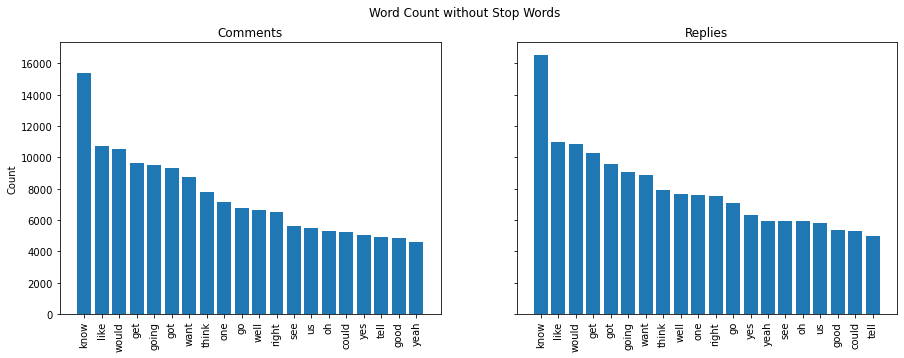

In [24]:
# Plotting the top 20 words for both comments and replies after removing stop words
fig3, ax3 = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
x_comment_word_no_stop = dict(fdist_common_comment_words_no_stop.most_common(20)).keys()
y_comment_word_count_no_stop = dict(fdist_common_comment_words_no_stop.most_common(20)).values()
x_reply_word_no_stop = dict(fdist_common_reply_words_no_stop.most_common(20)).keys()
y_reply_word_count_no_stop = dict(fdist_common_reply_words_no_stop.most_common(20)).values()
ax3[0].bar(x_comment_word_no_stop, y_comment_word_count_no_stop)
ax3[0].tick_params('x', rotation = 90)
ax3[0].set_title('Comments')
ax3[1].bar(x_reply_word_no_stop, y_reply_word_count_no_stop)
ax3[1].tick_params('x', rotation = 90)
ax3[1].set_title('Replies')
ax3[0].set_ylabel('Count')
fig3.suptitle('Word Count without Stop Words')
plt.show()

To further process our dataset, we will lemmatize the words into their root form using NLTK's WordNet Lemmatizer. Before that, we will tag the words using parts of speech labels (POS). These POS tags will then be converted into a format the lemmatizer could read and use.

In [25]:
# Tagging our words with parts of speed
df['Comment_no_sw with tag'] = df['Comment_no_sw'].apply(nltk.tag.pos_tag)
df['Reply_no_sw with tag'] = df['Reply_no_sw'].apply(nltk.tag.pos_tag)
df

,Comment,Reply,Processed Comment,Processed Reply,Comment Length,Reply Length,Tokenized Comment,Tokenized Reply,Comment_no_sw,Reply_no_sw,Comment_no_sw with tag,Reply_no_sw with tag
0,Can we make this quick? Roxanne Korrine and An...,"Well, I thought we'd start with pronunciation,...",can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,21,14,"[can, we, make, this, quick, roxanne, korrine,...","[well, i, thought, we, would, start, with, pro...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...","[(make, VB), (quick, JJ), (roxanne, NN), (korr...","[(well, RB), (thought, RB), (would, MD), (star..."
1,"Well, I thought we'd start with pronunciation,...",Not the hacking and gagging and spitting part....,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,14,9,"[well, i, thought, we, would, start, with, pro...","[not, the, hacking, and, gagging, and, spittin...","[well, thought, would, start, pronunciation, o...","[hacking, gagging, spitting, part, please]","[(well, RB), (thought, RB), (would, MD), (star...","[(hacking, VBG), (gagging, VBG), (spitting, VB..."
2,Not the hacking and gagging and spitting part....,Okay... then how 'bout we try out some French ...,not the hacking and gagging and spitting part ...,okay then how about we try out some french cui...,9,12,"[not, the, hacking, and, gagging, and, spittin...","[okay, then, how, about, we, try, out, some, f...","[hacking, gagging, spitting, part, please]","[okay, try, french, cuisine, saturday, night]","[(hacking, VBG), (gagging, VBG), (spitting, VB...","[(okay, JJ), (try, NN), (french, JJ), (cuisine..."
3,You're asking me out. That's so cute. What's y...,Forget it.,you are asking me out that is so cute what is ...,forget it,14,2,"[you, are, asking, me, out, that, is, so, cute...","[forget, it]","[asking, cute, name]",[forget],"[(asking, VBG), (cute, NN), (name, NN)]","[(forget, NN)]"
4,"No, no, it's my fault - we didn't have a prope...",Cameron.,no no it is my fault we did not have a proper ...,cameron,16,1,"[no, no, it, is, my, fault, we, did, not, have...",[cameron],"[fault, proper, introduction]",[cameron],"[(fault, NN), (proper, JJ), (introduction, NN)]","[(cameron, NN)]"
...,...,...,...,...,...,...,...,...,...,...,...,...
221611,"Your orders, Mr Vereker?",I'm to take the Sikali with the main column to...,your orders mr vereker,i am to take the sikali with the main column t...,4,13,"[your, orders, mr, vereker]","[i, am, to, take, the, sikali, with, the, main...","[orders, mr, vereker]","[take, sikali, main, column, river]","[(orders, NNS), (mr, VBP), (vereker, NN)]","[(take, VB), (sikali, NN), (main, JJ), (column..."
221612,I'm to take the Sikali with the main column to...,Lord Chelmsford seems to want me to stay back ...,i am to take the sikali with the main column t...,lord chelmsford seems to want me to stay back ...,13,12,"[i, am, to, take, the, sikali, with, the, main...","[lord, chelmsford, seems, to, want, me, to, st...","[take, sikali, main, column, river]","[lord, chelmsford, seems, want, stay, back, ba...","[(take, VB), (sikali, NN), (main, JJ), (column...","[(lord, NN), (chelmsford, NN), (seems, VBZ), (..."
221613,Lord Chelmsford seems to want me to stay back ...,I think Chelmsford wants a good man on the bor...,lord chelmsford seems to want me to stay back ...,i think chelmsford wants a good man on the bor...,12,23,"[lord, chelmsford, seems, to, want, me, to, st...","[i, think, chelmsford, wants, a, good, man, on...","[lord, chelmsford, seems, want, stay, back, ba...","[think, chelmsford, wants, good, man, border, ...","[(lord, NN), (chelmsford, NN), (seems, VBZ), (...","[(think, NN), (chelmsford, NN), (wants, VBZ), ..."
221614,"Well I assure you, Sir, I have no desire to cr...","And I assure you, you do not In fact I'd be ob...",well i assure you sir i have no desire to crea...,and i assure you you do not in fact i wo

In [26]:
# Defining function to convert our POS tags into WordNet format
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [27]:
# Convert tags into WordNet POS format
df['Comment_no_sw with WordNet'] = df['Comment_no_sw with tag'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df['Reply_no_sw with WordNet'] = df['Reply_no_sw with tag'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df

,Comment,Reply,Processed Comment,Processed Reply,Comment Length,Reply Length,Tokenized Comment,Tokenized Reply,Comment_no_sw,Reply_no_sw,Comment_no_sw with tag,Reply_no_sw with tag,Comment_no_sw with WordNet,Reply_no_sw with WordNet
0,Can we make this quick? Roxanne Korrine and An...,"Well, I thought we'd start with pronunciation,...",can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,21,14,"[can, we, make, this, quick, roxanne, korrine,...","[well, i, thought, we, would, start, with, pro...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...","[(make, VB), (quick, JJ), (roxanne, NN), (korr...","[(well, RB), (thought, RB), (would, MD), (star...","[(make, v), (quick, a), (roxanne, n), (korrine...","[(well, r), (thought, r), (would, n), (start, ..."
1,"Well, I thought we'd start with pronunciation,...",Not the hacking and gagging and spitting part....,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,14,9,"[well, i, thought, we, would, start, with, pro...","[not, the, hacking, and, gagging, and, spittin...","[well, thought, would, start, pronunciation, o...","[hacking, gagging, spitting, part, please]","[(well, RB), (thought, RB), (would, MD), (star...","[(hacking, VBG), (gagging, VBG), (spitting, VB...","[(well, r), (thought, r), (would, n), (start, ...","[(hacking, v), (gagging, v), (spitting, v), (p..."
2,Not the hacking and gagging and spitting part....,Okay... then how 'bout we try out some French ...,not the hacking and gagging and spitting part ...,okay then how about we try out some french cui...,9,12,"[not, the, hacking, and, gagging, and, spittin...","[okay, then, how, about, we, try, out, some, f...","[hacking, gagging, spitting, part, please]","[okay, try, french, cuisine, saturday, night]","[(hacking, VBG), (gagging, VBG), (spitting, VB...","[(okay, JJ), (try, NN), (french, JJ), (cuisine...","[(hacking, v), (gagging, v), (spitting, v), (p...","[(okay, a), (try, n), (french, a), (cuisine, n..."
3,You're asking me out. That's so cute. What's y...,Forget it.,you are asking me out that is so cute what is ...,forget it,14,2,"[you, are, asking, me, out, that, is, so, cute...","[forget, it]","[asking, cute, name]",[forget],"[(asking, VBG), (cute, NN), (name, NN)]","[(forget, NN)]","[(asking, v), (cute, n), (name, n)]","[(forget, n)]"
4,"No, no, it's my fault - we didn't have a prope...",Cameron.,no no it is my fault we did not have a proper ...,cameron,16,1,"[no, no, it, is, my, fault, we, did, not, have...",[cameron],"[fault, proper, introduction]",[cameron],"[(fault, NN), (proper, JJ), (introduction, NN)]","[(cameron, NN)]","[(fault, n), (proper, a), (introduction, n)]","[(cameron, n)]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221611,"Your orders, Mr Vereker?",I'm to take the Sikali with the main column to...,your orders mr vereker,i am to take the sikali with the main column t...,4,13,"[your, orders, mr, vereker]","[i, am, to, take, the, sikali, with, the, main...","[orders, mr, vereker]","[take, sikali, main, column, river]","[(orders, NNS), (mr, VBP), (vereker, NN)]","[(take, VB), (sikali, NN), (main, JJ), (column...","[(orders, n), (mr, v), (vereker, n)]","[(take, v), (sikali, n), (main, a), (column, n..."
221612,I'm to take the Sikali with the main column to...,Lord Chelmsford seems to want me to stay back ...,i am to take the sikali with the main column t...,lord chelmsford seems to want me to stay back ...,13,12,"[i, am, to, take, the, sikali, with, the, main...","[lord, chelmsford, seems, to, want, me, to, st...","[take, sikali, main, column, river]","[lord, chelmsford, seems, want, stay, back, ba...","[(take, VB), (sikali, NN), (main, JJ), (column...","[(lord, NN), (chelmsford, NN), (seems, VBZ), (...","[(take, v), (sikali, n), (main, a), (column, n...","[(lord, n), (chelmsford, n), (seems, v), (want..."
221613,Lord Chelmsford seems to want me t

In [28]:
# Lemmatize our tagged comments and replies
wordnet_lemmatizer = WordNetLemmatizer()
df['Lemmatized Comment_no_sw'] = df['Comment_no_sw with WordNet'].apply(lambda x: [wordnet_lemmatizer.lemmatize(word, tag) for (word, tag) in x])
df['Lemmatized Reply_no_sw'] = df['Reply_no_sw with WordNet'].apply(lambda x: [wordnet_lemmatizer.lemmatize(word, tag) for (word, tag) in x])
df

,Comment,Reply,Processed Comment,Processed Reply,Comment Length,Reply Length,Tokenized Comment,Tokenized Reply,Comment_no_sw,Reply_no_sw,Comment_no_sw with tag,Reply_no_sw with tag,Comment_no_sw with WordNet,Reply_no_sw with WordNet,Lemmatized Comment_no_sw,Lemmatized Reply_no_sw
0,Can we make this quick? Roxanne Korrine and An...,"Well, I thought we'd start with pronunciation,...",can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,21,14,"[can, we, make, this, quick, roxanne, korrine,...","[well, i, thought, we, would, start, with, pro...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...","[(make, VB), (quick, JJ), (roxanne, NN), (korr...","[(well, RB), (thought, RB), (would, MD), (star...","[(make, v), (quick, a), (roxanne, n), (korrine...","[(well, r), (thought, r), (would, n), (start, ...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o..."
1,"Well, I thought we'd start with pronunciation,...",Not the hacking and gagging and spitting part....,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,14,9,"[well, i, thought, we, would, start, with, pro...","[not, the, hacking, and, gagging, and, spittin...","[well, thought, would, start, pronunciation, o...","[hacking, gagging, spitting, part, please]","[(well, RB), (thought, RB), (would, MD), (star...","[(hacking, VBG), (gagging, VBG), (spitting, VB...","[(well, r), (thought, r), (would, n), (start, ...","[(hacking, v), (gagging, v), (spitting, v), (p...","[well, thought, would, start, pronunciation, o...","[hack, gag, spit, part, please]"
2,Not the hacking and gagging and spitting part....,Okay... then how 'bout we try out some French ...,not the hacking and gagging and spitting part ...,okay then how about we try out some french cui...,9,12,"[not, the, hacking, and, gagging, and, spittin...","[okay, then, how, about, we, try, out, some, f...","[hacking, gagging, spitting, part, please]","[okay, try, french, cuisine, saturday, night]","[(hacking, VBG), (gagging, VBG), (spitting, VB...","[(okay, JJ), (try, NN), (french, JJ), (cuisine...","[(hacking, v), (gagging, v), (spitting, v), (p...","[(okay, a), (try, n), (french, a), (cuisine, n...","[hack, gag, spit, part, please]","[okay, try, french, cuisine, saturday, night]"
3,You're asking me out. That's so cute. What's y...,Forget it.,you are asking me out that is so cute what is ...,forget it,14,2,"[you, are, asking, me, out, that, is, so, cute...","[forget, it]","[asking, cute, name]",[forget],"[(asking, VBG), (cute, NN), (name, NN)]","[(forget, NN)]","[(asking, v), (cute, n), (name, n)]","[(forget, n)]","[ask, cute, name]",[forget]
4,"No, no, it's my fault - we didn't have a prope...",Cameron.,no no it is my fault we did not have a proper ...,cameron,16,1,"[no, no, it, is, my, fault, we, did, not, have...",[cameron],"[fault, proper, introduction]",[cameron],"[(fault, NN), (proper, JJ), (introduction, NN)]","[(cameron, NN)]","[(fault, n), (proper, a), (introduction, n)]","[(cameron, n)]","[fault, proper, introduction]",[cameron]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221611,"Your orders, Mr Vereker?",I'm to take the Sikali with the main column to...,your orders mr vereker,i am to take the sikali with the main column t...,4,13,"[your, orders, mr, vereker]","[i, am, to, take, the, sikali, with, the, main...","[orders, mr, vereker]","[take, sikali, main, column, river]","[(orders, NNS), (mr, VBP), (vereker, NN)]","[(take, VB), (sikali, NN), (main, JJ), (column...","[(orders, n), (mr, v), (vereker, n)]","[(take, v), (sikali, n), (main, a), (column, n...","[order, mr, vereker]","[take, sikali, main, column, river]"
221612,I'm to take the Sikali with the main column to...,Lord Chelmsford seems to want me to stay back ...,i am to take the sikali with the main column t...,lord chelmsford seems to want me to sta

We could check on it the frequency of the data again now that everything has been lemmatized.

In [29]:
all_words_comments_lemmatized = list(itertools.chain.from_iterable(df['Lemmatized Comment_no_sw'][:]))
all_words_replies_lemmatized = list(itertools.chain.from_iterable(df['Lemmatized Reply_no_sw'][:]))

In [30]:
fdist_common_comment_words_lemmatized = FreqDist(all_words_comments_lemmatized)
fdist_common_comment_words_lemmatized.most_common(20)

[('get', 20547),
 ('go', 18676),
 ('know', 17111),
 ('like', 11119),
 ('want', 10721),
 ('would', 10528),
 ('think', 10173),
 ('say', 9213),
 ('well', 7764),
 ('one', 7547),
 ('come', 7295),
 ('tell', 7108),
 ('see', 7001),
 ('right', 6618),
 ('look', 5996),
 ('take', 5778),
 ('make', 5766),
 ('u', 5513),
 ('good', 5383),
 ('oh', 5278)]

In [31]:
fdist_common_reply_words_lemmatized = FreqDist(all_words_replies_lemmatized)
fdist_common_reply_words_lemmatized.most_common(20)

[('get', 21377),
 ('go', 18515),
 ('know', 18381),
 ('like', 11402),
 ('want', 10952),
 ('would', 10874),
 ('think', 10329),
 ('say', 9333),
 ('well', 8919),
 ('one', 8002),
 ('right', 7594),
 ('come', 7492),
 ('see', 7331),
 ('tell', 7156),
 ('yes', 6341),
 ('take', 6101),
 ('look', 6098),
 ('make', 6098),
 ('yeah', 5957),
 ('good', 5936)]

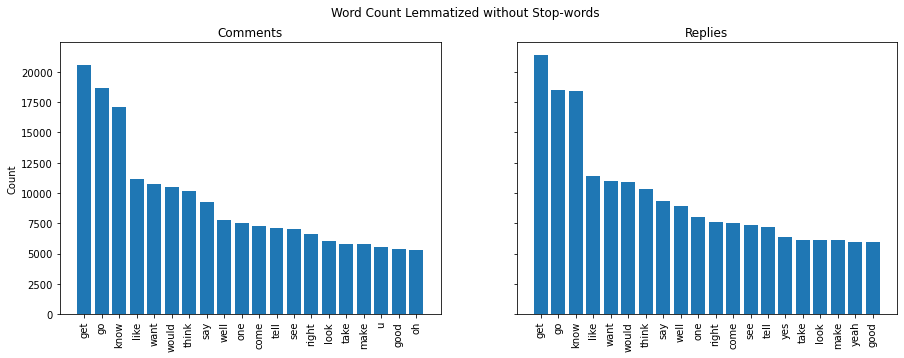

In [32]:
# Plotting the top 20 words for both comments and replies after lemmatizing
fig4, ax4 = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
x_comment_word_lemmatized = dict(fdist_common_comment_words_lemmatized.most_common(20)).keys()
y_comment_word_count_lemmatized = dict(fdist_common_comment_words_lemmatized.most_common(20)).values()
x_reply_word_lemmatized = dict(fdist_common_reply_words_lemmatized.most_common(20)).keys()
y_reply_word_count_lemmatized = dict(fdist_common_reply_words_lemmatized.most_common(20)).values()
ax4[0].bar(x_comment_word_lemmatized, y_comment_word_count_lemmatized)
ax4[0].tick_params('x', rotation = 90)
ax4[0].set_title('Comments')
ax4[1].bar(x_reply_word_lemmatized, y_reply_word_count_lemmatized)
ax4[1].tick_params('x', rotation = 90)
ax4[1].set_title('Replies')
ax4[0].set_ylabel('Count')
fig4.suptitle('Word Count Lemmatized without Stop-words')
plt.show()

The letter 'u' appears pretty often in the comments (5513 times), which is strange. What is going on? Apparently there an issue with NLTK's wordnet lemmatizer (see link: https://stackoverflow.com/questions/54784287/nltk-wordnetlemmatizer-processes-us-as-u). To deal with the 'u'/'us' issue, we will use an if/else statment for the word 'us'.

In [33]:
# Lemmatize our tagged comments and replies (an if statement is used for the word 'us')
df['Lemmatized Comment_no_sw New'] = df['Comment_no_sw with WordNet'].apply(lambda x: [wordnet_lemmatizer.lemmatize(word, tag) if word != 'us' else word for (word, tag) in x])
df['Lemmatized Reply_no_sw New'] = df['Reply_no_sw with WordNet'].apply(lambda x: [wordnet_lemmatizer.lemmatize(word, tag) if word != 'us' else word for (word, tag) in x])

In [34]:
all_words_comments_lemmatized2 = list(itertools.chain.from_iterable(df['Lemmatized Comment_no_sw New'][:]))
all_words_replies_lemmatized2 = list(itertools.chain.from_iterable(df['Lemmatized Reply_no_sw New'][:]))

In [35]:
fdist_common_comment_words_lemmatized2 = FreqDist(all_words_comments_lemmatized2)
fdist_common_comment_words_lemmatized2.most_common(20)

[('get', 20547),
 ('go', 18676),
 ('know', 17111),
 ('like', 11119),
 ('want', 10721),
 ('would', 10528),
 ('think', 10173),
 ('say', 9213),
 ('well', 7764),
 ('one', 7547),
 ('come', 7295),
 ('tell', 7108),
 ('see', 7001),
 ('right', 6618),
 ('look', 5996),
 ('take', 5778),
 ('make', 5766),
 ('us', 5507),
 ('good', 5383),
 ('oh', 5278)]

In [36]:
fdist_common_reply_words_lemmatized2 = FreqDist(all_words_replies_lemmatized2)
fdist_common_reply_words_lemmatized2.most_common(20)

[('get', 21377),
 ('go', 18515),
 ('know', 18381),
 ('like', 11402),
 ('want', 10952),
 ('would', 10874),
 ('think', 10329),
 ('say', 9333),
 ('well', 8919),
 ('one', 8002),
 ('right', 7594),
 ('come', 7492),
 ('see', 7331),
 ('tell', 7156),
 ('yes', 6341),
 ('take', 6101),
 ('look', 6098),
 ('make', 6098),
 ('yeah', 5957),
 ('good', 5936)]

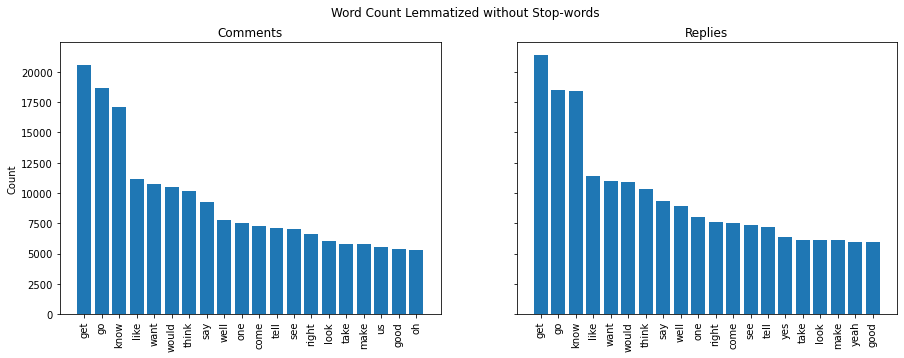

In [37]:
# Plotting the top 20 words for both comments and replies after lemmatizing
fig5, ax5 = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
x_comment_word_lemmatized2 = dict(fdist_common_comment_words_lemmatized2.most_common(20)).keys()
y_comment_word_count_lemmatized2 = dict(fdist_common_comment_words_lemmatized2.most_common(20)).values()
x_reply_word_lemmatized2 = dict(fdist_common_reply_words_lemmatized2.most_common(20)).keys()
y_reply_word_count_lemmatized2 = dict(fdist_common_reply_words_lemmatized2.most_common(20)).values()
ax5[0].bar(x_comment_word_lemmatized2, y_comment_word_count_lemmatized2)
ax5[0].tick_params('x', rotation = 90)
ax5[0].set_title('Comments')
ax5[1].bar(x_reply_word_lemmatized2, y_reply_word_count_lemmatized2)
ax5[1].tick_params('x', rotation = 90)
ax5[1].set_title('Replies')
ax5[0].set_ylabel('Count')
fig5.suptitle('Word Count Lemmatized without Stop-words')
plt.show()

The if/else does appear to have fixed most, if not all, of the problems (5507 out of 5513). Either the remaining 6 are actual words (used in the context of a pseudonym like 'U') or it's part of a different problem during lemmatization. We'll leave this alone for now given that it is mostly fixed.

Given we have processed and removed so many words, we should check to see if there are any empty comments and replies. Before that however, we'll tidy up our DataFrame. The new columns will replace the old lemmatized columns.

In [38]:
# Dropping the old 'Lemmatized Comment_no_sw' and 'Lemmatized Reply_no_sw' columns
df = df.drop(columns=['Lemmatized Comment_no_sw', 'Lemmatized Reply_no_sw'], axis=1)

In [39]:
df['Comment_no_sw Length'] = df['Lemmatized Comment_no_sw New'].apply(len)
df['Reply_no_sw Length'] = df['Lemmatized Reply_no_sw New'].apply(len)

# Renaming the new columns to 'Lemmatized Comment_no_sw' and 'Lemmatized Reply_no_sw'
df = df.rename({'Lemmatized Comment_no_sw New':'Lemmatized Comment_no_sw', 
                'Lemmatized Reply_no_sw New':'Lemmatized Reply_no_sw'}, axis=1)
df

,Comment,Reply,Processed Comment,Processed Reply,Comment Length,Reply Length,Tokenized Comment,Tokenized Reply,Comment_no_sw,Reply_no_sw,Comment_no_sw with tag,Reply_no_sw with tag,Comment_no_sw with WordNet,Reply_no_sw with WordNet,Lemmatized Comment_no_sw,Lemmatized Reply_no_sw,Comment_no_sw Length,Reply_no_sw Length
0,Can we make this quick? Roxanne Korrine and An...,"Well, I thought we'd start with pronunciation,...",can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,21,14,"[can, we, make, this, quick, roxanne, korrine,...","[well, i, thought, we, would, start, with, pro...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...","[(make, VB), (quick, JJ), (roxanne, NN), (korr...","[(well, RB), (thought, RB), (would, MD), (star...","[(make, v), (quick, a), (roxanne, n), (korrine...","[(well, r), (thought, r), (would, n), (start, ...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...",11,6
1,"Well, I thought we'd start with pronunciation,...",Not the hacking and gagging and spitting part....,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,14,9,"[well, i, thought, we, would, start, with, pro...","[not, the, hacking, and, gagging, and, spittin...","[well, thought, would, start, pronunciation, o...","[hacking, gagging, spitting, part, please]","[(well, RB), (thought, RB), (would, MD), (star...","[(hacking, VBG), (gagging, VBG), (spitting, VB...","[(well, r), (thought, r), (would, n), (start, ...","[(hacking, v), (gagging, v), (spitting, v), (p...","[well, thought, would, start, pronunciation, o...","[hack, gag, spit, part, please]",6,5
2,Not the hacking and gagging and spitting part....,Okay... then how 'bout we try out some French ...,not the hacking and gagging and spitting part ...,okay then how about we try out some french cui...,9,12,"[not, the, hacking, and, gagging, and, spittin...","[okay, then, how, about, we, try, out, some, f...","[hacking, gagging, spitting, part, please]","[okay, try, french, cuisine, saturday, night]","[(hacking, VBG), (gagging, VBG), (spitting, VB...","[(okay, JJ), (try, NN), (french, JJ), (cuisine...","[(hacking, v), (gagging, v), (spitting, v), (p...","[(okay, a), (try, n), (french, a), (cuisine, n...","[hack, gag, spit, part, please]","[okay, try, french, cuisine, saturday, night]",5,6
3,You're asking me out. That's so cute. What's y...,Forget it.,you are asking me out that is so cute what is ...,forget it,14,2,"[you, are, asking, me, out, that, is, so, cute...","[forget, it]","[asking, cute, name]",[forget],"[(asking, VBG), (cute, NN), (name, NN)]","[(forget, NN)]","[(asking, v), (cute, n), (name, n)]","[(forget, n)]","[ask, cute, name]",[forget],3,1
4,"No, no, it's my fault - we didn't have a prope...",Cameron.,no no it is my fault we did not have a proper ...,cameron,16,1,"[no, no, it, is, my, fault, we, did, not, have...",[cameron],"[fault, proper, introduction]",[cameron],"[(fault, NN), (proper, JJ), (introduction, NN)]","[(cameron, NN)]","[(fault, n), (proper, a), (introduction, n)]","[(cameron, n)]","[fault, proper, introduction]",[cameron],3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221611,"Your orders, Mr Vereker?",I'm to take the Sikali with the main column to...,your orders mr vereker,i am to take the sikali with the main column t...,4,13,"[your, orders, mr, vereker]","[i, am, to, take, the, sikali, with, the, main...","[orders, mr, vereker]","[take, sikali, main, column, river]","[(orders, NNS), (mr, VBP), (vereker, NN)]","[(take, VB), (sikali, NN), (main, JJ), (column...","[(orders, n), (mr, v), (vereker, n)]","[(take, v), (sikali, n), (main, a), (column, n...","[order, mr, vereker]","[take, sikali, main, column, river]",3,5
221612,I'm to take the Sikali with the main column to...,Lord Chelmsford seems to want me to stay back ...,i am to take the

Now to checking and clean up any rows with empty comments or replies.

In [40]:
# Checking the length of processed comments and replies
df[df['Comment_no_sw Length'] == 0].count()

Comment                       11607
Reply                         11607
Processed Comment             11607
Processed Reply               11607
Comment Length                11607
Reply Length                  11607
Tokenized Comment             11607
Tokenized Reply               11607
Comment_no_sw                 11607
Reply_no_sw                   11607
Comment_no_sw with tag        11607
Reply_no_sw with tag          11607
Comment_no_sw with WordNet    11607
Reply_no_sw with WordNet      11607
Lemmatized Comment_no_sw      11607
Lemmatized Reply_no_sw        11607
Comment_no_sw Length          11607
Reply_no_sw Length            11607
dtype: int64

In [41]:
df[df['Reply_no_sw Length'] == 0].count()

Comment                       10871
Reply                         10871
Processed Comment             10871
Processed Reply               10871
Comment Length                10871
Reply Length                  10871
Tokenized Comment             10871
Tokenized Reply               10871
Comment_no_sw                 10871
Reply_no_sw                   10871
Comment_no_sw with tag        10871
Reply_no_sw with tag          10871
Comment_no_sw with WordNet    10871
Reply_no_sw with WordNet      10871
Lemmatized Comment_no_sw      10871
Lemmatized Reply_no_sw        10871
Comment_no_sw Length          10871
Reply_no_sw Length            10871
dtype: int64

There is quite a bit of empty responses. As we need comments and replies as pairs, these empty responses is of no value to us. We will remove these rows using Pandas' drop() function.

In [42]:
# Dropping rows with processed comments and replies that ends up empty
df = df.drop(df[df['Comment_no_sw Length'] == 0].index)
df = df.drop(df[df['Reply_no_sw Length'] == 0].index)

In [43]:
df[df['Comment_no_sw Length'] == 0].count()

Comment                       0
Reply                         0
Processed Comment             0
Processed Reply               0
Comment Length                0
Reply Length                  0
Tokenized Comment             0
Tokenized Reply               0
Comment_no_sw                 0
Reply_no_sw                   0
Comment_no_sw with tag        0
Reply_no_sw with tag          0
Comment_no_sw with WordNet    0
Reply_no_sw with WordNet      0
Lemmatized Comment_no_sw      0
Lemmatized Reply_no_sw        0
Comment_no_sw Length          0
Reply_no_sw Length            0
dtype: int64

In [44]:
df[df['Reply_no_sw Length'] == 0].count()

Comment                       0
Reply                         0
Processed Comment             0
Processed Reply               0
Comment Length                0
Reply Length                  0
Tokenized Comment             0
Tokenized Reply               0
Comment_no_sw                 0
Reply_no_sw                   0
Comment_no_sw with tag        0
Reply_no_sw with tag          0
Comment_no_sw with WordNet    0
Reply_no_sw with WordNet      0
Lemmatized Comment_no_sw      0
Lemmatized Reply_no_sw        0
Comment_no_sw Length          0
Reply_no_sw Length            0
dtype: int64

In [45]:
df

,Comment,Reply,Processed Comment,Processed Reply,Comment Length,Reply Length,Tokenized Comment,Tokenized Reply,Comment_no_sw,Reply_no_sw,Comment_no_sw with tag,Reply_no_sw with tag,Comment_no_sw with WordNet,Reply_no_sw with WordNet,Lemmatized Comment_no_sw,Lemmatized Reply_no_sw,Comment_no_sw Length,Reply_no_sw Length
0,Can we make this quick? Roxanne Korrine and An...,"Well, I thought we'd start with pronunciation,...",can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,21,14,"[can, we, make, this, quick, roxanne, korrine,...","[well, i, thought, we, would, start, with, pro...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...","[(make, VB), (quick, JJ), (roxanne, NN), (korr...","[(well, RB), (thought, RB), (would, MD), (star...","[(make, v), (quick, a), (roxanne, n), (korrine...","[(well, r), (thought, r), (would, n), (start, ...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...",11,6
1,"Well, I thought we'd start with pronunciation,...",Not the hacking and gagging and spitting part....,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,14,9,"[well, i, thought, we, would, start, with, pro...","[not, the, hacking, and, gagging, and, spittin...","[well, thought, would, start, pronunciation, o...","[hacking, gagging, spitting, part, please]","[(well, RB), (thought, RB), (would, MD), (star...","[(hacking, VBG), (gagging, VBG), (spitting, VB...","[(well, r), (thought, r), (would, n), (start, ...","[(hacking, v), (gagging, v), (spitting, v), (p...","[well, thought, would, start, pronunciation, o...","[hack, gag, spit, part, please]",6,5
2,Not the hacking and gagging and spitting part....,Okay... then how 'bout we try out some French ...,not the hacking and gagging and spitting part ...,okay then how about we try out some french cui...,9,12,"[not, the, hacking, and, gagging, and, spittin...","[okay, then, how, about, we, try, out, some, f...","[hacking, gagging, spitting, part, please]","[okay, try, french, cuisine, saturday, night]","[(hacking, VBG), (gagging, VBG), (spitting, VB...","[(okay, JJ), (try, NN), (french, JJ), (cuisine...","[(hacking, v), (gagging, v), (spitting, v), (p...","[(okay, a), (try, n), (french, a), (cuisine, n...","[hack, gag, spit, part, please]","[okay, try, french, cuisine, saturday, night]",5,6
3,You're asking me out. That's so cute. What's y...,Forget it.,you are asking me out that is so cute what is ...,forget it,14,2,"[you, are, asking, me, out, that, is, so, cute...","[forget, it]","[asking, cute, name]",[forget],"[(asking, VBG), (cute, NN), (name, NN)]","[(forget, NN)]","[(asking, v), (cute, n), (name, n)]","[(forget, n)]","[ask, cute, name]",[forget],3,1
4,"No, no, it's my fault - we didn't have a prope...",Cameron.,no no it is my fault we did not have a proper ...,cameron,16,1,"[no, no, it, is, my, fault, we, did, not, have...",[cameron],"[fault, proper, introduction]",[cameron],"[(fault, NN), (proper, JJ), (introduction, NN)]","[(cameron, NN)]","[(fault, n), (proper, a), (introduction, n)]","[(cameron, n)]","[fault, proper, introduction]",[cameron],3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221611,"Your orders, Mr Vereker?",I'm to take the Sikali with the main column to...,your orders mr vereker,i am to take the sikali with the main column t...,4,13,"[your, orders, mr, vereker]","[i, am, to, take, the, sikali, with, the, main...","[orders, mr, vereker]","[take, sikali, main, column, river]","[(orders, NNS), (mr, VBP), (vereker, NN)]","[(take, VB), (sikali, NN), (main, JJ), (column...","[(orders, n), (mr, v), (vereker, n)]","[(take, v), (sikali, n), (main, a), (column, n...","[order, mr, vereker]","[take, sikali, main, column, river]",3,5
221612,I'm to take the Sikali with the main column to...,Lord Chelmsford seems to want me to stay back ...,i am to take the

In [46]:
all_words_comments_lemmatized3 = list(itertools.chain.from_iterable(df['Lemmatized Comment_no_sw'][:]))
all_words_replies_lemmatized3 = list(itertools.chain.from_iterable(df['Lemmatized Reply_no_sw'][:]))

In [47]:
fdist_common_comment_words_lemmatized3 = FreqDist(all_words_comments_lemmatized3)
fdist_common_comment_words_lemmatized3.most_common(20)

[('get', 19593),
 ('go', 17728),
 ('know', 16234),
 ('like', 10656),
 ('want', 10118),
 ('would', 10063),
 ('think', 9636),
 ('say', 8789),
 ('well', 7441),
 ('one', 7142),
 ('come', 6944),
 ('tell', 6731),
 ('see', 6636),
 ('right', 6337),
 ('look', 5695),
 ('make', 5508),
 ('take', 5465),
 ('us', 5275),
 ('good', 5160),
 ('oh', 5039)]

In [48]:
fdist_common_reply_words_lemmatized3 = FreqDist(all_words_replies_lemmatized3)
fdist_common_reply_words_lemmatized3.most_common(20)

[('get', 20224),
 ('go', 17448),
 ('know', 17252),
 ('like', 10770),
 ('would', 10343),
 ('want', 10317),
 ('think', 9759),
 ('say', 8782),
 ('well', 8460),
 ('one', 7527),
 ('right', 7248),
 ('come', 7052),
 ('see', 6921),
 ('tell', 6750),
 ('yes', 6085),
 ('yeah', 5810),
 ('make', 5767),
 ('look', 5722),
 ('take', 5719),
 ('oh', 5694)]

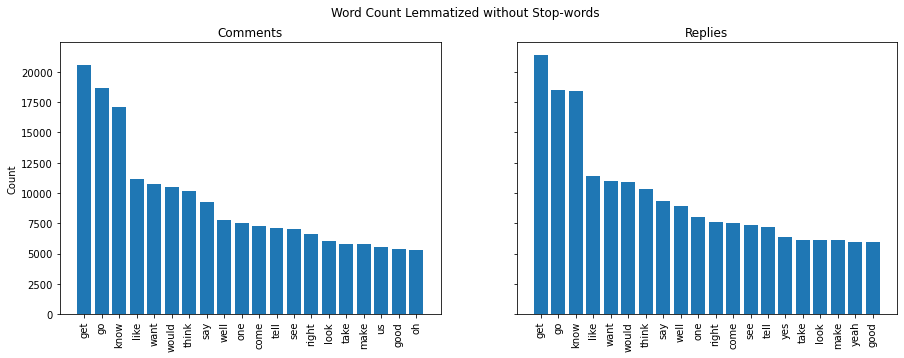

In [49]:
# Plotting the top 20 words for both comments and replies after lemmatizing and removing empty responses
fig6, ax6 = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
x_comment_word_lemmatized2 = dict(fdist_common_comment_words_lemmatized2.most_common(20)).keys()
y_comment_word_count_lemmatized2 = dict(fdist_common_comment_words_lemmatized2.most_common(20)).values()
x_reply_word_lemmatized2 = dict(fdist_common_reply_words_lemmatized2.most_common(20)).keys()
y_reply_word_count_lemmatized2 = dict(fdist_common_reply_words_lemmatized2.most_common(20)).values()
ax6[0].bar(x_comment_word_lemmatized2, y_comment_word_count_lemmatized2)
ax6[0].tick_params('x', rotation = 90)
ax6[0].set_title('Comments')
ax6[1].bar(x_reply_word_lemmatized2, y_reply_word_count_lemmatized2)
ax6[1].tick_params('x', rotation = 90)
ax6[1].set_title('Replies')
ax6[0].set_ylabel('Count')
fig6.suptitle('Word Count Lemmatized without Stop-words')
plt.show()

In [50]:
df

,Comment,Reply,Processed Comment,Processed Reply,Comment Length,Reply Length,Tokenized Comment,Tokenized Reply,Comment_no_sw,Reply_no_sw,Comment_no_sw with tag,Reply_no_sw with tag,Comment_no_sw with WordNet,Reply_no_sw with WordNet,Lemmatized Comment_no_sw,Lemmatized Reply_no_sw,Comment_no_sw Length,Reply_no_sw Length
0,Can we make this quick? Roxanne Korrine and An...,"Well, I thought we'd start with pronunciation,...",can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,21,14,"[can, we, make, this, quick, roxanne, korrine,...","[well, i, thought, we, would, start, with, pro...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...","[(make, VB), (quick, JJ), (roxanne, NN), (korr...","[(well, RB), (thought, RB), (would, MD), (star...","[(make, v), (quick, a), (roxanne, n), (korrine...","[(well, r), (thought, r), (would, n), (start, ...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...",11,6
1,"Well, I thought we'd start with pronunciation,...",Not the hacking and gagging and spitting part....,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,14,9,"[well, i, thought, we, would, start, with, pro...","[not, the, hacking, and, gagging, and, spittin...","[well, thought, would, start, pronunciation, o...","[hacking, gagging, spitting, part, please]","[(well, RB), (thought, RB), (would, MD), (star...","[(hacking, VBG), (gagging, VBG), (spitting, VB...","[(well, r), (thought, r), (would, n), (start, ...","[(hacking, v), (gagging, v), (spitting, v), (p...","[well, thought, would, start, pronunciation, o...","[hack, gag, spit, part, please]",6,5
2,Not the hacking and gagging and spitting part....,Okay... then how 'bout we try out some French ...,not the hacking and gagging and spitting part ...,okay then how about we try out some french cui...,9,12,"[not, the, hacking, and, gagging, and, spittin...","[okay, then, how, about, we, try, out, some, f...","[hacking, gagging, spitting, part, please]","[okay, try, french, cuisine, saturday, night]","[(hacking, VBG), (gagging, VBG), (spitting, VB...","[(okay, JJ), (try, NN), (french, JJ), (cuisine...","[(hacking, v), (gagging, v), (spitting, v), (p...","[(okay, a), (try, n), (french, a), (cuisine, n...","[hack, gag, spit, part, please]","[okay, try, french, cuisine, saturday, night]",5,6
3,You're asking me out. That's so cute. What's y...,Forget it.,you are asking me out that is so cute what is ...,forget it,14,2,"[you, are, asking, me, out, that, is, so, cute...","[forget, it]","[asking, cute, name]",[forget],"[(asking, VBG), (cute, NN), (name, NN)]","[(forget, NN)]","[(asking, v), (cute, n), (name, n)]","[(forget, n)]","[ask, cute, name]",[forget],3,1
4,"No, no, it's my fault - we didn't have a prope...",Cameron.,no no it is my fault we did not have a proper ...,cameron,16,1,"[no, no, it, is, my, fault, we, did, not, have...",[cameron],"[fault, proper, introduction]",[cameron],"[(fault, NN), (proper, JJ), (introduction, NN)]","[(cameron, NN)]","[(fault, n), (proper, a), (introduction, n)]","[(cameron, n)]","[fault, proper, introduction]",[cameron],3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221611,"Your orders, Mr Vereker?",I'm to take the Sikali with the main column to...,your orders mr vereker,i am to take the sikali with the main column t...,4,13,"[your, orders, mr, vereker]","[i, am, to, take, the, sikali, with, the, main...","[orders, mr, vereker]","[take, sikali, main, column, river]","[(orders, NNS), (mr, VBP), (vereker, NN)]","[(take, VB), (sikali, NN), (main, JJ), (column...","[(orders, n), (mr, v), (vereker, n)]","[(take, v), (sikali, n), (main, a), (column, n...","[order, mr, vereker]","[take, sikali, main, column, river]",3,5
221612,I'm to take the Sikali with the main column to...,Lord Chelmsford seems to want me to stay back ...,i am to take the

There might still be issues within the dataset, but we could start analyzing the data using NLTK's sentiment analyzer. As a start, the sentiment scores could be used to help categorize 'postive' from 'negative' responses. These could be features when start use the data for training our chatbot.

In [51]:
# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
df['Sentiment Comment_no_sw'] = df['Lemmatized Comment_no_sw'].apply(lambda x: sid.polarity_scores(' '.join(x)))
df['Sentiment Reply_no_sw'] = df['Lemmatized Reply_no_sw'].apply(lambda x: sid.polarity_scores(' '.join(x)))
df

,Comment,Reply,Processed Comment,Processed Reply,Comment Length,Reply Length,Tokenized Comment,Tokenized Reply,Comment_no_sw,Reply_no_sw,Comment_no_sw with tag,Reply_no_sw with tag,Comment_no_sw with WordNet,Reply_no_sw with WordNet,Lemmatized Comment_no_sw,Lemmatized Reply_no_sw,Comment_no_sw Length,Reply_no_sw Length,Sentiment Comment_no_sw,Sentiment Reply_no_sw
0,Can we make this quick? Roxanne Korrine and An...,"Well, I thought we'd start with pronunciation,...",can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,21,14,"[can, we, make, this, quick, roxanne, korrine,...","[well, i, thought, we, would, start, with, pro...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...","[(make, VB), (quick, JJ), (roxanne, NN), (korr...","[(well, RB), (thought, RB), (would, MD), (star...","[(make, v), (quick, a), (roxanne, n), (korrine...","[(well, r), (thought, r), (would, n), (start, ...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...",11,6,"{'neg': 0.29, 'neu': 0.71, 'pos': 0.0, 'compou...","{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound..."
1,"Well, I thought we'd start with pronunciation,...",Not the hacking and gagging and spitting part....,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,14,9,"[well, i, thought, we, would, start, with, pro...","[not, the, hacking, and, gagging, and, spittin...","[well, thought, would, start, pronunciation, o...","[hacking, gagging, spitting, part, please]","[(well, RB), (thought, RB), (would, MD), (star...","[(hacking, VBG), (gagging, VBG), (spitting, VB...","[(well, r), (thought, r), (would, n), (start, ...","[(hacking, v), (gagging, v), (spitting, v), (p...","[well, thought, would, start, pronunciation, o...","[hack, gag, spit, part, please]",6,5,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...","{'neg': 0.312, 'neu': 0.39, 'pos': 0.299, 'com..."
2,Not the hacking and gagging and spitting part....,Okay... then how 'bout we try out some French ...,not the hacking and gagging and spitting part ...,okay then how about we try out some french cui...,9,12,"[not, the, hacking, and, gagging, and, spittin...","[okay, then, how, about, we, try, out, some, f...","[hacking, gagging, spitting, part, please]","[okay, try, french, cuisine, saturday, night]","[(hacking, VBG), (gagging, VBG), (spitting, VB...","[(okay, JJ), (try, NN), (french, JJ), (cuisine...","[(hacking, v), (gagging, v), (spitting, v), (p...","[(okay, a), (try, n), (french, a), (cuisine, n...","[hack, gag, spit, part, please]","[okay, try, french, cuisine, saturday, night]",5,6,"{'neg': 0.312, 'neu': 0.39, 'pos': 0.299, 'com...","{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'comp..."
3,You're asking me out. That's so cute. What's y...,Forget it.,you are asking me out that is so cute what is ...,forget it,14,2,"[you, are, asking, me, out, that, is, so, cute...","[forget, it]","[asking, cute, name]",[forget],"[(asking, VBG), (cute, NN), (name, NN)]","[(forget, NN)]","[(asking, v), (cute, n), (name, n)]","[(forget, n)]","[ask, cute, name]",[forget],3,1,"{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...","{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
4,"No, no, it's my fault - we didn't have a prope...",Cameron.,no no it is my fault we did not have a proper ...,cameron,16,1,"[no, no, it, is, my, fault, we, did, not, have...",[cameron],"[fault, proper, introduction]",[cameron],"[(fault, NN), (proper, JJ), (introduction, NN)]","[(cameron, NN)]","[(fault, n), (proper, a), (introduction, n)]","[(cameron, n)]","[fault, proper, introduction]",[cameron],3,1,"{'neg': 0.574, 'neu': 0.426, 'pos': 0.0, 'comp...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221611,"Your orders, Mr Vereker?",I'm to take the Sikali with the main column to...,your orders mr vereker,

In [52]:
# Sentiment Analysis Compound Score
df['Sentiment Comment_no_sw Compound Score'] = df['Sentiment Comment_no_sw'].apply(lambda x: x['compound'])
df['Sentiment Reply_no_sw Compound Score'] = df['Sentiment Reply_no_sw'].apply(lambda x: x['compound'])
df

,Comment,Reply,Processed Comment,Processed Reply,Comment Length,Reply Length,Tokenized Comment,Tokenized Reply,Comment_no_sw,Reply_no_sw,...,Comment_no_sw with WordNet,Reply_no_sw with WordNet,Lemmatized Comment_no_sw,Lemmatized Reply_no_sw,Comment_no_sw Length,Reply_no_sw Length,Sentiment Comment_no_sw,Sentiment Reply_no_sw,Sentiment Comment_no_sw Compound Score,Sentiment Reply_no_sw Compound Score
0,Can we make this quick? Roxanne Korrine and An...,"Well, I thought we'd start with pronunciation,...",can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,21,14,"[can, we, make, this, quick, roxanne, korrine,...","[well, i, thought, we, would, start, with, pro...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...",...,"[(make, v), (quick, a), (roxanne, n), (korrine...","[(well, r), (thought, r), (would, n), (start, ...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...",11,6,"{'neg': 0.29, 'neu': 0.71, 'pos': 0.0, 'compou...","{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",-0.6240,0.4588
1,"Well, I thought we'd start with pronunciation,...",Not the hacking and gagging and spitting part....,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,14,9,"[well, i, thought, we, would, start, with, pro...","[not, the, hacking, and, gagging, and, spittin...","[well, thought, would, start, pronunciation, o...","[hacking, gagging, spitting, part, please]",...,"[(well, r), (thought, r), (would, n), (start, ...","[(hacking, v), (gagging, v), (spitting, v), (p...","[well, thought, would, start, pronunciation, o...","[hack, gag, spit, part, please]",6,5,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...","{'neg': 0.312, 'neu': 0.39, 'pos': 0.299, 'com...",0.4588,-0.0258
2,Not the hacking and gagging and spitting part....,Okay... then how 'bout we try out some French ...,not the hacking and gagging and spitting part ...,okay then how about we try out some french cui...,9,12,"[not, the, hacking, and, gagging, and, spittin...","[okay, then, how, about, we, try, out, some, f...","[hacking, gagging, spitting, part, please]","[okay, try, french, cuisine, saturday, night]",...,"[(hacking, v), (gagging, v), (spitting, v), (p...","[(okay, a), (try, n), (french, a), (cuisine, n...","[hack, gag, spit, part, please]","[okay, try, french, cuisine, saturday, night]",5,6,"{'neg': 0.312, 'neu': 0.39, 'pos': 0.299, 'com...","{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'comp...",-0.0258,0.2263
3,You're asking me out. That's so cute. What's y...,Forget it.,you are asking me out that is so cute what is ...,forget it,14,2,"[you, are, asking, me, out, that, is, so, cute...","[forget, it]","[asking, cute, name]",[forget],...,"[(asking, v), (cute, n), (name, n)]","[(forget, n)]","[ask, cute, name]",[forget],3,1,"{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...","{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.4588,-0.2263
4,"No, no, it's my fault - we didn't have a prope...",Cameron.,no no it is my fault we did not have a proper ...,cameron,16,1,"[no, no, it, is, my, fault, we, did, not, have...",[cameron],"[fault, proper, introduction]",[cameron],...,"[(fault, n), (proper, a), (introduction, n)]","[(cameron, n)]","[fault, proper, introduction]",[cameron],3,1,"{'neg': 0.574, 'neu': 0.426, 'pos': 0.0, 'comp...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",-0.4019,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221611,"Your orders, Mr Vereker?",I'm to take the Sikali with the main column to...,your orders mr vereker,i am to take the sikali with the main column t...,4,13,"[your, orders, mr, vereker]","[i, am, to, take, the, sikali, with, the, main...","[orders, mr, vereker]","[take, sikali, main, column, river]",...,"[(orders, n), (mr, v), (vereker, n)]","[(take, v), (sikali, n), (main, a), (column, n...","[order, m

In [53]:
# Categorize Sentiment Analysis Compound Score
df['Sentiment Comment_no_sw Classification'] = df['Sentiment Comment_no_sw Compound Score'].apply(lambda x: 'positive' if x>0 else ('negative' if x<0 else 'neutral'))
df['Sentiment Reply_no_sw Classification'] = df['Sentiment Reply_no_sw Compound Score'].apply(lambda x: 'positive' if x>0 else ('negative' if x<0 else 'neutral'))
df

,Comment,Reply,Processed Comment,Processed Reply,Comment Length,Reply Length,Tokenized Comment,Tokenized Reply,Comment_no_sw,Reply_no_sw,...,Lemmatized Comment_no_sw,Lemmatized Reply_no_sw,Comment_no_sw Length,Reply_no_sw Length,Sentiment Comment_no_sw,Sentiment Reply_no_sw,Sentiment Comment_no_sw Compound Score,Sentiment Reply_no_sw Compound Score,Sentiment Comment_no_sw Classification,Sentiment Reply_no_sw Classification
0,Can we make this quick? Roxanne Korrine and An...,"Well, I thought we'd start with pronunciation,...",can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,21,14,"[can, we, make, this, quick, roxanne, korrine,...","[well, i, thought, we, would, start, with, pro...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...",...,"[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...",11,6,"{'neg': 0.29, 'neu': 0.71, 'pos': 0.0, 'compou...","{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",-0.6240,0.4588,negative,positive
1,"Well, I thought we'd start with pronunciation,...",Not the hacking and gagging and spitting part....,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,14,9,"[well, i, thought, we, would, start, with, pro...","[not, the, hacking, and, gagging, and, spittin...","[well, thought, would, start, pronunciation, o...","[hacking, gagging, spitting, part, please]",...,"[well, thought, would, start, pronunciation, o...","[hack, gag, spit, part, please]",6,5,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...","{'neg': 0.312, 'neu': 0.39, 'pos': 0.299, 'com...",0.4588,-0.0258,positive,negative
2,Not the hacking and gagging and spitting part....,Okay... then how 'bout we try out some French ...,not the hacking and gagging and spitting part ...,okay then how about we try out some french cui...,9,12,"[not, the, hacking, and, gagging, and, spittin...","[okay, then, how, about, we, try, out, some, f...","[hacking, gagging, spitting, part, please]","[okay, try, french, cuisine, saturday, night]",...,"[hack, gag, spit, part, please]","[okay, try, french, cuisine, saturday, night]",5,6,"{'neg': 0.312, 'neu': 0.39, 'pos': 0.299, 'com...","{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'comp...",-0.0258,0.2263,negative,positive
3,You're asking me out. That's so cute. What's y...,Forget it.,you are asking me out that is so cute what is ...,forget it,14,2,"[you, are, asking, me, out, that, is, so, cute...","[forget, it]","[asking, cute, name]",[forget],...,"[ask, cute, name]",[forget],3,1,"{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...","{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.4588,-0.2263,positive,negative
4,"No, no, it's my fault - we didn't have a prope...",Cameron.,no no it is my fault we did not have a proper ...,cameron,16,1,"[no, no, it, is, my, fault, we, did, not, have...",[cameron],"[fault, proper, introduction]",[cameron],...,"[fault, proper, introduction]",[cameron],3,1,"{'neg': 0.574, 'neu': 0.426, 'pos': 0.0, 'comp...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",-0.4019,0.0000,negative,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221611,"Your orders, Mr Vereker?",I'm to take the Sikali with the main column to...,your orders mr vereker,i am to take the sikali with the main column t...,4,13,"[your, orders, mr, vereker]","[i, am, to, take, the, sikali, with, the, main...","[orders, mr, vereker]","[take, sikali, main, column, river]",...,"[order, mr, vereker]","[take, sikali, main, column, river]",3,5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0000,neutral,neutral
221612,I'm to take the Sikali with the main column to...,Lord Chelmsford seems to want me to stay back ...,i am to take the sikali with the main column t...,lord chelmsford seems to want me to stay back ...,13,12,"[i, a

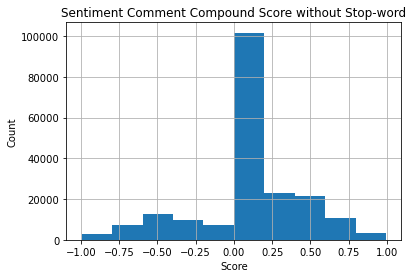

In [54]:
df['Sentiment Comment_no_sw Compound Score'].hist()
plt.title('Sentiment Comment Compound Score without Stop-word')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

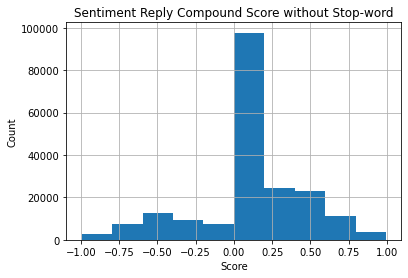

In [55]:
df['Sentiment Reply_no_sw Compound Score'].hist()
plt.title('Sentiment Reply Compound Score without Stop-word')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [56]:
# Sentiment Analysis Compound Score Overall
df['Sentiment Score_no_sw Overall'] = df['Sentiment Comment_no_sw Compound Score'] + df['Sentiment Reply_no_sw Compound Score']
df['Sentiment Score_no_sw Overall Classification'] = df['Sentiment Score_no_sw Overall'].apply(lambda x: 'positive' if x>0 else ('negative' if x<0 else 'neutral'))
df

,Comment,Reply,Processed Comment,Processed Reply,Comment Length,Reply Length,Tokenized Comment,Tokenized Reply,Comment_no_sw,Reply_no_sw,...,Comment_no_sw Length,Reply_no_sw Length,Sentiment Comment_no_sw,Sentiment Reply_no_sw,Sentiment Comment_no_sw Compound Score,Sentiment Reply_no_sw Compound Score,Sentiment Comment_no_sw Classification,Sentiment Reply_no_sw Classification,Sentiment Score_no_sw Overall,Sentiment Score_no_sw Overall Classification
0,Can we make this quick? Roxanne Korrine and An...,"Well, I thought we'd start with pronunciation,...",can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,21,14,"[can, we, make, this, quick, roxanne, korrine,...","[well, i, thought, we, would, start, with, pro...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...",...,11,6,"{'neg': 0.29, 'neu': 0.71, 'pos': 0.0, 'compou...","{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",-0.6240,0.4588,negative,positive,-0.1652,negative
1,"Well, I thought we'd start with pronunciation,...",Not the hacking and gagging and spitting part....,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,14,9,"[well, i, thought, we, would, start, with, pro...","[not, the, hacking, and, gagging, and, spittin...","[well, thought, would, start, pronunciation, o...","[hacking, gagging, spitting, part, please]",...,6,5,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...","{'neg': 0.312, 'neu': 0.39, 'pos': 0.299, 'com...",0.4588,-0.0258,positive,negative,0.4330,positive
2,Not the hacking and gagging and spitting part....,Okay... then how 'bout we try out some French ...,not the hacking and gagging and spitting part ...,okay then how about we try out some french cui...,9,12,"[not, the, hacking, and, gagging, and, spittin...","[okay, then, how, about, we, try, out, some, f...","[hacking, gagging, spitting, part, please]","[okay, try, french, cuisine, saturday, night]",...,5,6,"{'neg': 0.312, 'neu': 0.39, 'pos': 0.299, 'com...","{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'comp...",-0.0258,0.2263,negative,positive,0.2005,positive
3,You're asking me out. That's so cute. What's y...,Forget it.,you are asking me out that is so cute what is ...,forget it,14,2,"[you, are, asking, me, out, that, is, so, cute...","[forget, it]","[asking, cute, name]",[forget],...,3,1,"{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...","{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.4588,-0.2263,positive,negative,0.2325,positive
4,"No, no, it's my fault - we didn't have a prope...",Cameron.,no no it is my fault we did not have a proper ...,cameron,16,1,"[no, no, it, is, my, fault, we, did, not, have...",[cameron],"[fault, proper, introduction]",[cameron],...,3,1,"{'neg': 0.574, 'neu': 0.426, 'pos': 0.0, 'comp...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",-0.4019,0.0000,negative,neutral,-0.4019,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221611,"Your orders, Mr Vereker?",I'm to take the Sikali with the main column to...,your orders mr vereker,i am to take the sikali with the main column t...,4,13,"[your, orders, mr, vereker]","[i, am, to, take, the, sikali, with, the, main...","[orders, mr, vereker]","[take, sikali, main, column, river]",...,3,5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0000,neutral,neutral,0.0000,neutral
221612,I'm to take the Sikali with the main column to...,Lord Chelmsford seems to want me to stay back ...,i am to take the sikali with the main column t...,lord chelmsford seems to want me to stay back ...,13,12,"[i, am, to, take, the, sikali, with, the, main...","[lord, chelmsford, seems, to, want, me, to, st...","[take, sikali, main, column, river]","[lord, chelmsford, seems, want, stay, back, ba...",...,5,7,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 0.822, 'pos

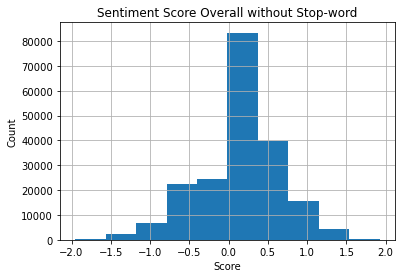

In [57]:
df['Sentiment Score_no_sw Overall'].hist()
plt.title('Sentiment Score Overall without Stop-word')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

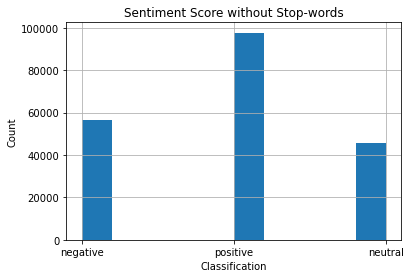

In [58]:
df['Sentiment Score_no_sw Overall Classification'].hist()
plt.title('Sentiment Score without Stop-words')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()

For now, we will export this data as a csv for further processing (something like bag of words or TD-IDF).

In [59]:
df.to_csv('processed_movie_dialogue_pairs.csv')